## Run and Rise Over Trend Feats

In [1]:
import pandas as pd
from tqdm.notebook import tqdm  # Use notebook version of tqdm for better compatibility with Jupyter
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.patches as patches
from pandas.tseries.offsets import DateOffset
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
plt.style.use('default')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the price data

In [ ]:
# db_path = '../raw/daily-2020.csv'

# db_path = '/content/drive/MyDrive/daily-2020.csv'
# price_df = pd.read_csv(db_path, usecols=["timestamp", "close", "open", "high", "low", "volume"])
# price_df.set_index('timestamp', inplace=True)
# price_df.index = pd.to_datetime(price_df.index, unit='s')

In [4]:
ratio_feat = pd.read_csv('/content/drive/MyDrive/ratio_2015_2021.csv')

# Reverse the order of the rows in the ratio_feat DataFrame
ratio_feat = ratio_feat.sort_values(by='timestamp').reset_index(drop=True)
ratio_feat.set_index('timestamp', inplace=True)
ratio_feat = ratio_feat.sort_index()
ratio_feat

,ratio,close
timestamp,,
2015-01-01,1.782609,314.136000
2015-01-02,0.975000,315.207000
2015-01-03,0.250000,284.234000
2015-01-04,0.568627,264.201000
2015-01-05,0.290909,274.570000
...,...,...
2021-02-11,1.319149,47680.424438
2021-02-12,1.351064,47622.568921
2021-02-13,1.390805,47056.769565


In [5]:
# Define the ticker for Bitcoin (BTC-USD is the ticker for Bitcoin in US Dollars on Yahoo Finance)
ticker = "BTC-USD"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2021-02-16"

# Fetch the historical data from Yahoo Finance
btc_data = yf.download(ticker, start=start_date, end=end_date)

# Keep only the required columns and reset the index to have a column 'timestamp'
btc_data = btc_data[["Open", "High", "Low", "Close", "Volume"]]
btc_data.reset_index(inplace=True)
btc_data.rename(columns={"Date": "timestamp", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"}, inplace=True)
btc_data.set_index('timestamp', inplace=True)

# Display the first few rows of the data
btc_data.head()

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
timestamp,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800


In [6]:
# Create a complete date range from 2015-01-01 to 2021-02-15
full_date_range = pd.date_range(start="2015-01-01", end="2021-02-15")

# Find missing dates in ratio_feat compared to the full_date_range
missing_dates_in_ratio_feat = full_date_range.difference(ratio_feat.index)

# Convert the missing dates to a DataFrame (if needed)
missing_dates_df = pd.DataFrame(missing_dates_in_ratio_feat, columns=['timestamp'])

# Print missing dates
print("Missing dates in ratio_feat:")
missing_dates_df

Missing dates in ratio_feat:


,timestamp
0,2015-12-31
1,2016-08-07
2,2016-12-31
3,2017-03-27
4,2017-12-31
...,...
92,2019-03-27
93,2019-03-28
94,2019-03-29
95,2019-03-30


In [7]:
# Convert the 'timestamp' column of missing_dates_df to a list for easy removal
missing_dates = missing_dates_df['timestamp'].tolist()

# Step 1: Remove rows from btc_data with missing timestamps
btc_data_cleaned = btc_data.drop(index=missing_dates, errors='ignore')
len(btc_data_cleaned)

2141

In [8]:
# Convert indices to datetime if they are not already
btc_data_cleaned.index = pd.to_datetime(btc_data_cleaned.index)
ratio_feat.index = pd.to_datetime(ratio_feat.index)

# Ensure both indices are sorted
btc_data_cleaned.sort_index(inplace=True)
ratio_feat.sort_index(inplace=True)

# Check if indices are equal
if not btc_data_cleaned.index.equals(ratio_feat.index):
    print("Indices do not match. Please check the indices of both DataFrames.")
else:
    # Assign the 'ratio' column from ratio_feat to btc_data_cleaned
    btc_data_cleaned['sentiment_ratio'] = ratio_feat['ratio']

    # Check the updated btc_data_cleaned
    btc_data_cleaned.head()

In [9]:
if btc_data_cleaned['sentiment_ratio'].equals(ratio_feat['ratio']):
  print('all equal!')
else:
  print('not equal')

all equal!


In [10]:
btc_data_cleaned

,open,high,low,close,volume,sentiment_ratio
timestamp,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,1.782609
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,0.975000
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,0.250000
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909
...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805


In [11]:
price_df = btc_data_cleaned
price_df

,open,high,low,close,volume,sentiment_ratio
timestamp,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,1.782609
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,0.975000
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,0.250000
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909
...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805


### Volatility calculation and event extraction

In [12]:
def get_daily_vol(close, span0=100):
    """
    Calculate the daily volatility of closing prices.

    Parameters:
    - close: A pandas Series of closing prices.
    - span0: The span for the EWM standard deviation.

    Returns:
    - A pandas Series of daily volatility estimates.
    """
    # Find the start of the previous day for each day
    prev_day_start = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    prev_day_start = prev_day_start[prev_day_start > 0]

    # Create a series with the start of the previous day for each day
    prev_day_start = pd.Series(close.index[prev_day_start - 1], index=close.index[close.shape[0] - prev_day_start.shape[0]:])

    # Calculate daily returns
    daily_returns = close.loc[prev_day_start.index] / close.loc[prev_day_start.values].values - 1

    # Calculate EWM standard deviation of daily returns
    daily_vol = daily_returns.ewm(span=span0).std()

    return daily_returns, daily_vol

In [13]:
price_df["daily_returns"], price_df["volatility"] = get_daily_vol(price_df.close)

In [14]:
price_df.dropna(inplace=True)

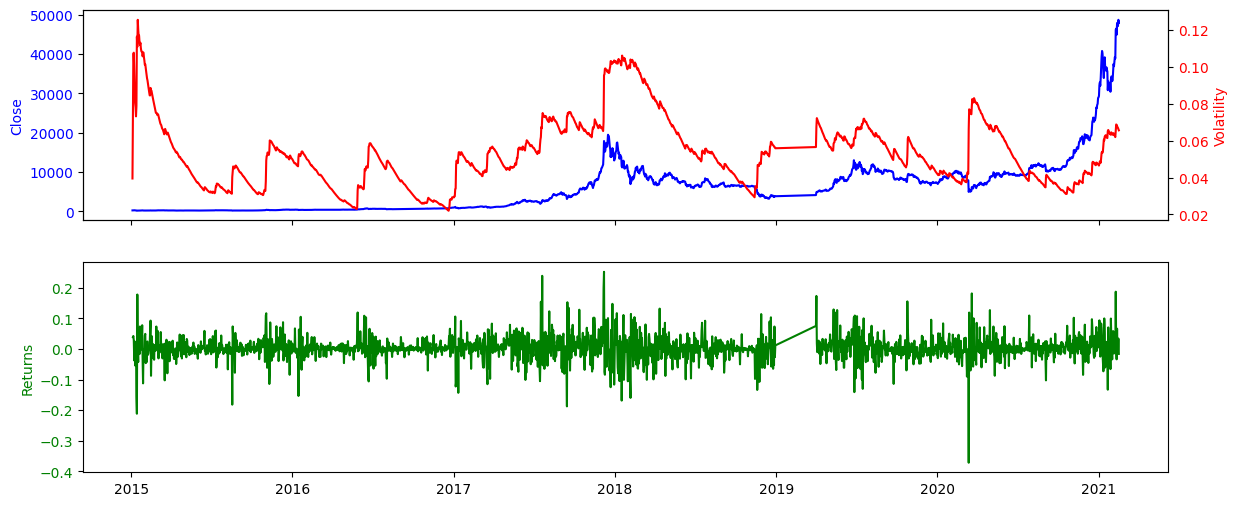

In [15]:
# Calculate returns
price_df['returns'] = price_df['close'].pct_change()

# Create a new figure with two subplots
fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))

# Plot 'close' on the primary y-axis of the first subplot
ax1.plot(price_df.index, price_df['close'], color='blue')
ax1.set_ylabel('Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for 'volatility' on the first subplot
ax2 = ax1.twinx()
ax2.plot(price_df.index, price_df['volatility'], color='red')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot 'returns' on the second subplot
ax3.plot(price_df.index, price_df['returns'], color='green')
ax3.set_ylabel('Returns', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Show the plot
plt.show()

In [16]:
def get_t_events(raw_price, volatility, base_threshold):
    """
    :param raw_price: (series) of close prices.
    :param volatility: (series) of volatility values.
    :param base_threshold: (float) base level for the threshold.
    :return: (datetime index vector) vector of datetimes when the events occurred. This is used later to sample.
    """
    print('Applying Symmetric CUSUM filter.')

    t_events, s_pos, s_neg = [], 0, 0

    # log returns
    diff = np.log(raw_price).diff().dropna()

    # Get event time stamps for the entire series
    for i in tqdm(diff.index[1:]):
        # Adjust the threshold based on volatility
        threshold = base_threshold * volatility.loc[i]

        s_pos = max(0.0, float(s_pos + diff.loc[i]))
        s_neg = min(0.0, float(s_neg + diff.loc[i]))

        if s_neg < -threshold:
            s_neg = 0
            t_events.append(i)

        elif s_pos > threshold:
            s_pos = 0
            t_events.append(i)

    event_timestamps = pd.DatetimeIndex(t_events)
    return event_timestamps

In [17]:
events = get_t_events(price_df.close, price_df.volatility, 1.5)

Applying Symmetric CUSUM filter.


  0%|          | 0/2136 [00:00<?, ?it/s]

In [18]:
price_df["event"] = price_df.index.isin(events)

In [19]:
price_df

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event
timestamp,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False
...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False


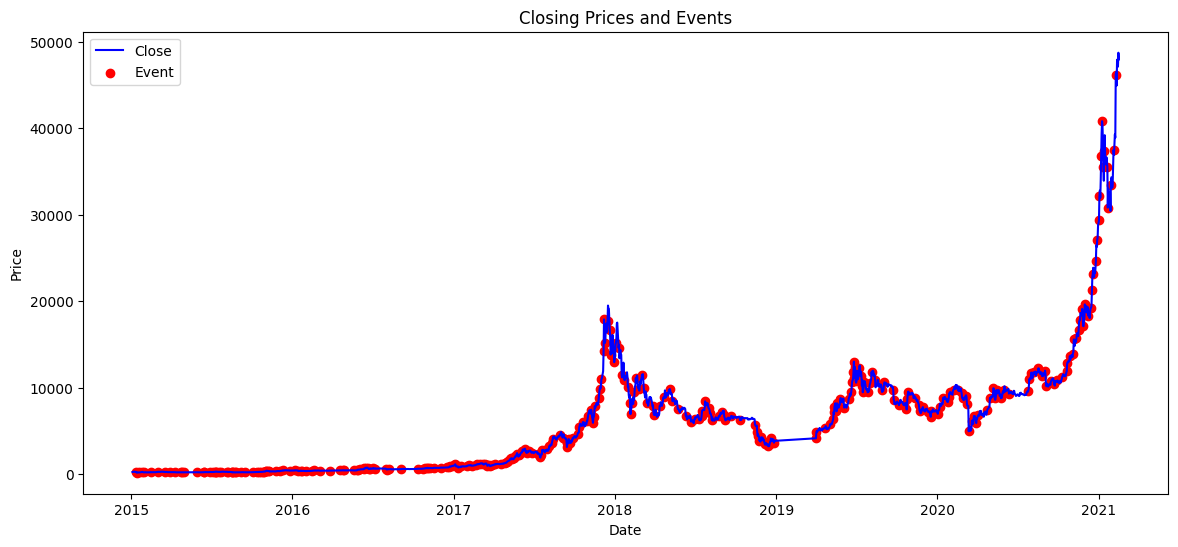

In [20]:
# Plot the closing prices
plt.subplots(figsize=(14, 6))
plt.plot(price_df.index, price_df['close'], color='blue', label='Close')

# Add dots for the event dates
plt.scatter(events, price_df.loc[events, 'close'], color='red', label='Event')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices and Events')
plt.legend()

# Show the plot
plt.show()

### Triple Barrier Labeling

In [21]:
# Define labels as named constants for readability
LABEL_UP = 1
LABEL_DOWN = -1
LABEL_NEUTRAL = 0

In [22]:
def calculate_barriers(df, i, window, upper_barrier_factor, lower_barrier_factor, volatility_period, barrier_type='volatility'):
    end_window = min(i+window, len(df)-1)  # Ensure the window does not exceed the dataframe

    # Calculate the mean volatility or daily returns over the volatility_period
    if barrier_type == 'volatility':
        mean_value = df.loc[i-volatility_period+1:i, 'volatility'].mean()
        current_value = df.loc[i, 'volatility']
    elif barrier_type == 'returns':
        mean_value = df.loc[i-volatility_period+1:i, 'daily_returns'].mean()
        current_value = df.loc[i, 'daily_returns']
    else:
        print(f'the barrier type: {barrier_type}')
        raise ValueError("Invalid barrier_type. Choose either 'volatility' or 'returns'")

    df.loc[i:end_window, 'upper_barrier'] = df.loc[i, 'close'] + (df.loc[i, 'close'] * current_value * upper_barrier_factor)
    df.loc[i:end_window, 'lower_barrier'] = df.loc[i, 'close'] - (df.loc[i, 'close'] * current_value * lower_barrier_factor)
    return df

In [23]:
def label_observations(df, origin, i, label):
    df.loc[origin:i+1, 'labels'] = label
    return df

In [24]:
def triple_barrier_labeling(sdf, volatility_period=7, upper_barrier_factor=1, lower_barrier_factor=1, vertical_barrier=7, min_trend_days=2, barrier_type='volatility', touch_type="HL"):
    df = sdf.copy()
    df = df.reset_index()

    # Initialize labels and window start
    df['labels'] = LABEL_NEUTRAL
    df['window_start'] = False

    window = vertical_barrier
    origin = 0
    touch_upper = lambda high, barrier: high >= barrier
    touch_lower = lambda low, barrier: low <= barrier
    # For each observation
    for i in range(0, len(df)):
        # Define your barriers at the beginning of each window
        if i == origin:
            df = calculate_barriers(df, i, window, upper_barrier_factor, lower_barrier_factor, volatility_period, barrier_type)
            df.loc[i, 'window_start'] = True  # Mark the start of the window

        # one of the conditions were met
        if touch_upper(df.loc[i, "high" if touch_type == 'HL' else 'close'], df.loc[i, "upper_barrier"]):
            if (i - origin > min_trend_days):
                # label the observations
                df = label_observations(df, origin, i, LABEL_UP)
                # set new origin
                origin = i + 1 if i + 1 < len(df) else i  # Check if i + 1 is within the DataFrame's index
                # reset window
                window = vertical_barrier
        elif touch_lower(df.loc[i, "low" if touch_type == 'HL' else 'close'], df.loc[i, "lower_barrier"]):
            if (i - origin > min_trend_days):
                # label the observations
                df = label_observations(df, origin, i, LABEL_DOWN)
                # set new origin
                origin = i + 1 if i + 1 < len(df) else i  # Check if i + 1 is within the DataFrame's index
                # reset window
                window = vertical_barrier

        # none of the conditions were met
        else:
            if window > 0:
                # reduce window size by one
                window = window - 1
            else:
                # reset window
                window = vertical_barrier
                # label neutral from origin to origin + window
                df.loc[origin:min(origin+window, len(df)-1), 'labels'] = LABEL_NEUTRAL  # Ensure the window does not exceed the dataframe
                # set origin to the next id
                origin = i + 1 if i + 1 < len(df) else i  # Check if i + 1 is within the DataFrame's index

    df = df.set_index("timestamp")
    return df

In [25]:
tbl_df = triple_barrier_labeling(price_df, volatility_period=8, upper_barrier_factor=1.0, lower_barrier_factor=1.1, vertical_barrier=5, min_trend_days=2, barrier_type='volatility')

In [26]:
tbl_df.labels.value_counts()

,count
labels,
0,845
1,783
-1,510


In [27]:
def plot_triple_barrier(df,loc=1,sample_point_index=10, start_index = 0, n_days = 100 ,time_out = 20 ):
  """
    parameters :
      loc = 1 => position of smaller plot up
      loc = 2 => position of smaller plot down
      sample_point_index : the point which is going to show the labelling details
      time_out : how many next day's data are used for labeling of each point
  """
  price = df.close.to_numpy()[start_index:start_index+n_days]
  # Set initial barriers
  profit_taking = 1.0  # Multiplier for the volatility adjustment
  stop_loss = 1.0  # Multiplier for the volatility adjustment

  # Calculate rolling volatility (standard deviation)
  window = 10  # Window size for rolling calculation
  rolling_volatility = pd.Series(price).rolling(window=window).std().fillna(0)

  # Initialize arrays to hold the barrier values
  upper_barrier = np.zeros(n_days)
  lower_barrier = np.zeros(n_days)

  # Initialize arrays to hold labels
  high_points = np.zeros(n_days, dtype=bool)
  low_points = np.zeros(n_days, dtype=bool)
  neutral_points = np.zeros(n_days, dtype=bool)

  # Iterate over each day to calculate barriers and labels
  for i in range(n_days):
      if i + time_out < n_days:
          future_prices = price[i:i + time_out]
          upper_barrier[i] = price[i] + (profit_taking * rolling_volatility[i])
          lower_barrier[i] = price[i] - (stop_loss * rolling_volatility[i])

          # Check if any future price crosses the barriers
          if np.any(future_prices >= upper_barrier[i]):
              high_points[i] = True
          elif np.any(future_prices <= lower_barrier[i]):
              low_points[i] = True
          else:
              neutral_points[i] = True
      else:
          upper_barrier[i] = np.nan
          lower_barrier[i] = np.nan
          neutral_points[i] = True

  # Plot the stock prices and barriers
  fig, ax = plt.subplots(figsize=(14, 7))
  ax.plot(price, label='Stock Price', color='blue')
  ax.plot(upper_barrier, color='green', linestyle='--', label='Profit Taking Barrier (Volatility Adjusted)')
  ax.plot(lower_barrier, color='red', linestyle='--', label='Stop Loss Barrier (Volatility Adjusted)')
  ax.axvline(time_out, color='purple', linestyle='--', label='Time Out Barrier')

  # Highlight high, low, and neutral points
  ax.scatter(np.where(high_points)[0], price[high_points], color='green', marker='^', label='High Points')
  ax.scatter(np.where(low_points)[0], price[low_points], color='red', marker='v', label='Low Points')
  ax.scatter(np.where(neutral_points)[0], price[neutral_points], color='orange', marker='o', label='Neutral Points')

  # Adding labels and title
  ax.set_xlabel('Days')
  ax.set_ylabel('Price')
  ax.set_title('Stock Prices with Volatility-Adjusted Triple Barrier and Points Classification')
  ax.legend()
  ax.grid(True)



  if sample_point_index is not np.nan:
      if loc == 1:
        inset_ax = inset_axes(ax, width="25%", height="25%", loc=9)
      else:
        inset_ax = inset_axes(ax, width="25%", height="25%", loc=8)

      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), price[sample_point_index:sample_point_index + time_out], label='Stock Price', color='blue')
      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), np.full(time_out, upper_barrier[sample_point_index]), color='green', linestyle='--', label='Upper Barrier')
      inset_ax.plot(range(sample_point_index, sample_point_index + time_out), np.full(time_out, lower_barrier[sample_point_index]), color='red', linestyle='--', label='Lower Barrier')
      inset_ax.grid(True)

      if loc == 1 :
        pos = (0.5, 0.9)
      else :
        pos = (0.3, 0.3)

      ax.annotate('',
                  xy=(sample_point_index, price[sample_point_index]),
                  xycoords='data',
                  xytext=pos,
                  textcoords='axes fraction',
                  arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5),
                  horizontalalignment='right', verticalalignment='bottom')

  plt.show()

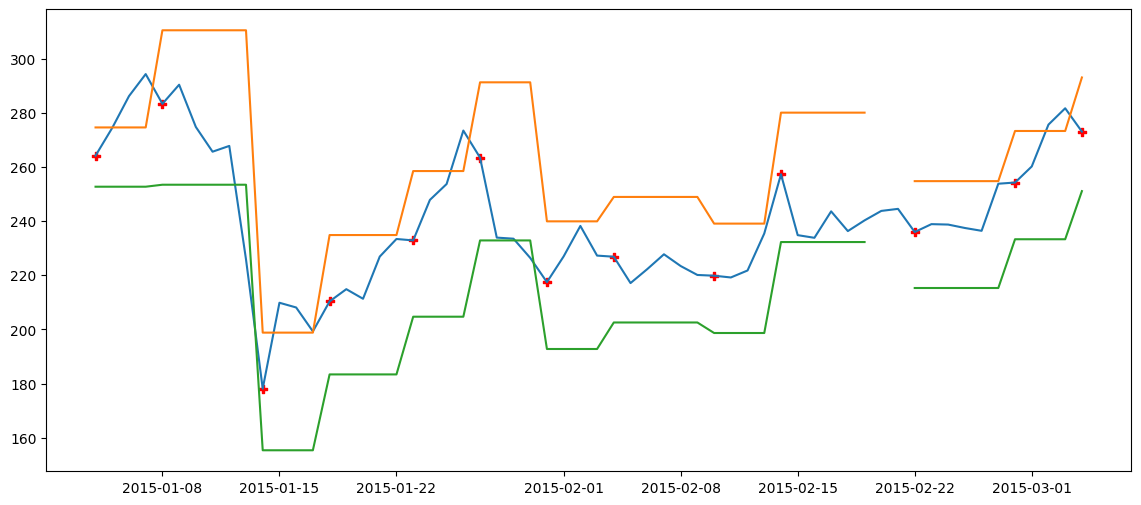

In [28]:
plot_df = tbl_df[0:60]
# Create a new DataFrame where 'window_start' is True
window_starts = plot_df[plot_df['window_start']]

plt.subplots(figsize=(14, 6))

# Plot the 'close', 'upper_barrier', and 'lower_barrier' columns
plt.plot(plot_df.index, plot_df[['close', 'upper_barrier', 'lower_barrier']], ms=1)

# Add markers at the start of each window
plt.scatter(window_starts.index, window_starts['close'], color='red', marker="P")

plt.show()

In [29]:
def band_generator(labels):
    bands = [{'label': labels.iloc[0], 'from': labels.index[0]}]
    for l, i in enumerate(labels):
        if i == bands[-1]["label"]:
            pass
        else:
            bands[-1]["to"] = labels.index[l]
            # Check if l + 1 is within the range of the labels' indices
            if l + 1 < len(labels):
                bands.append({'label': i, 'from': labels.index[l + 1]})

    # Check if the last band has a 'to' field
    if 'to' not in bands[-1]:
        bands[-1]['to'] = labels.index[-1]

    return bands

In [30]:
def plot_labels(price_series, labels):
    """
    Plot price series with bullish and bearish areas.

    Parameters:
    - price_series: A pandas Series of prices.
    - labels: A pandas Series of labels (-1, 0, 1).
    """
    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax2 = ax1.twinx()

    # Plot the price series
    ax1.plot(price_series.index, price_series.values, label='Price', color='blue')

    # Draw a box for each window
    for label in labels:
        # Shift "from" and "to" by half a day
        from_timestamp = label["from"] - DateOffset(hours=12)
        to_timestamp = label["to"] + DateOffset(hours=12)

        # Ensure the timestamps are within the price series index
        from_timestamp = max(from_timestamp, price_series.index[0])
        to_timestamp = min(to_timestamp, price_series.index[-1])

        # Add the band
        ax2.fill_betweenx(ax1.get_ylim(), from_timestamp, to_timestamp, color='green' if label["label"] == 1 else "red" if label["label"] == -1 else 'white' , alpha=0.3)

    # Add a legend
    ax1.legend()

    # Show the plot
    plt.show()

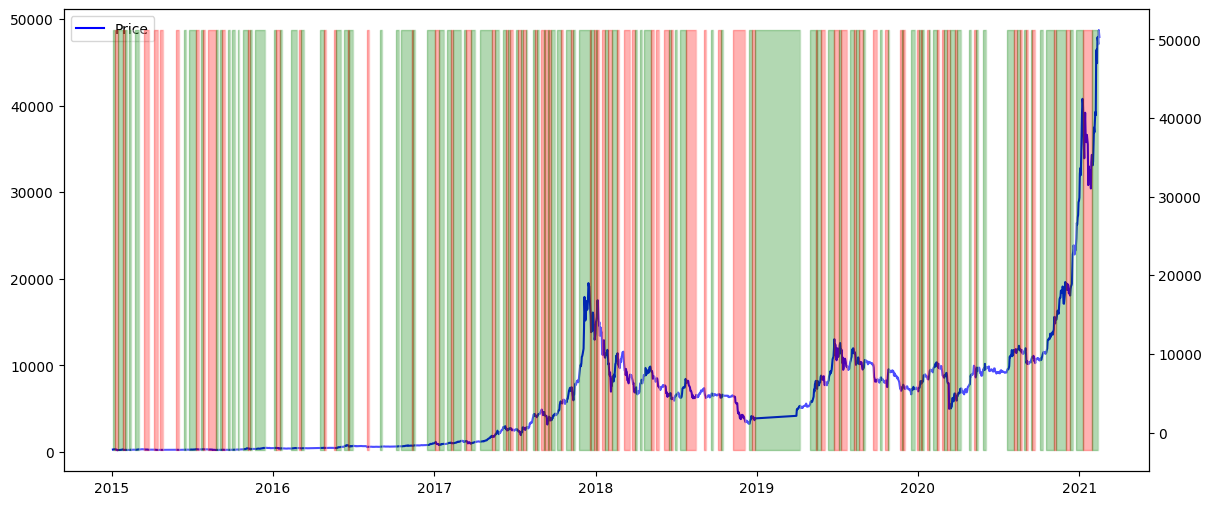

In [31]:
prices = tbl_df
bands = band_generator(prices.labels)
plot_labels(prices.close, bands)

In [32]:
price_df

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event
timestamp,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False
...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False


In [33]:
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,labels,window_start,upper_barrier,lower_barrier
timestamp,,,,,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False,1,True,274.624324,252.722759
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False,1,False,274.624324,252.722759
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False,1,False,274.624324,252.722759
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False,1,False,274.624324,252.722759
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False,-1,True,310.525083,253.455306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,1,True,51156.590744,44337.347448
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,0,False,51156.590744,44337.347448
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False,0,False,51156.590744,44337.347448


### Calculate Engineered Features

In [34]:
# Calculate average duration of trends
def calculate_average_duration(df):
    current_label = df['labels'].iloc[0]
    duration_sum = 0
    trend_count = 0
    trend_start = df.index[0]
    for i in range(1, len(df)):
        if df['labels'].iloc[i] != current_label:
            duration_sum += (df.index[i] - trend_start).days
            trend_count += 1
            trend_start = df.index[i]
            current_label = df['labels'].iloc[i]
    average_duration = duration_sum / trend_count if trend_count > 0 else 0
    return average_duration

In [35]:
average_duration = calculate_average_duration(prices)
average_duration

9.257261410788383

In [36]:
average_duration = int(average_duration)
average_duration

9

In [37]:
def run_over_trend(df, avg_duration):
    df['run_over_trend'] = 0.0
    window_size = pd.Timedelta(days=avg_duration)

    # Iterate through the dataset in windows of `avg_duration`
    start_date = df.index[0]
    while start_date <= df.index[-1]:
        end_date = start_date + window_size

        # Extract the current window
        window = df[start_date:end_date]

        # Check if the window is empty
        if window.empty:
            # Move to the next window
            start_date = end_date
            continue

        trend_length = (window.index[-1] - window.index[0]).days

        if trend_length == 0:
          # Move to the next window
          start_date = end_date
          continue

        for i, date in enumerate(window.index):
            run_position = (date - window.index[0]).days + 1
            df.loc[date, 'run_over_trend'] = run_position / trend_length

        # Move to the next window
        start_date = end_date

    return df

In [38]:
def rise_over_trend(df, avg_duration):
    # Calculate average percentage change across all trend windows
    trend_changes = []
    window_size = pd.Timedelta(days=avg_duration)

    start_date = df.index[0]
    while start_date <= df.index[-1]:
        end_date = start_date + window_size
        window = df[start_date:end_date]

        if len(window) < 2:
            start_date = end_date
            continue

        start_price = window['close'].iloc[0]
        end_price = window['close'].iloc[-1]
        percentage_change = ((end_price - start_price) / start_price) * 100
        trend_changes.append(percentage_change)

        start_date = end_date

    average_change = sum(trend_changes) / len(trend_changes) if trend_changes else 0

    # Calculate rise_over_trend for each data point
    df['rise_over_trend'] = 0.0
    start_date = df.index[0]

    while start_date <= df.index[-1]:
        end_date = start_date + window_size
        window = df[start_date:end_date]

        if len(window) < 2:
            start_date = end_date
            continue

        start_price = window['close'].iloc[0]
        for date in window.index:
            current_price = window.loc[date, 'close']
            percentage_change = ((current_price - start_price) / start_price) * 100
            df.loc[date, 'rise_over_trend'] = percentage_change / average_change if average_change != 0 else 0

        start_date = end_date

    return df


In [39]:
def previous_window_trend(df, avg_duration):
    df['previous_window_trend'] = 0
    window_size = pd.Timedelta(days=avg_duration)
    previous_label = None

    start_date = df.index[0]

    while start_date <= df.index[-1]:
        end_date = start_date + window_size
        window = df[start_date:end_date]

        if previous_label is not None:
            df.loc[start_date:end_date, 'previous_window_trend'] = previous_label

        if not window.empty:
            previous_label = window['labels'].iloc[-1]

        start_date = end_date

    return df


In [40]:
prices = run_over_trend(prices, average_duration)
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,labels,window_start,upper_barrier,lower_barrier,run_over_trend
timestamp,,,,,,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False,1,True,274.624324,252.722759,0.111111
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False,1,False,274.624324,252.722759,0.222222
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False,1,False,274.624324,252.722759,0.333333
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False,1,False,274.624324,252.722759,0.444444
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False,-1,True,310.525083,253.455306,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,1,True,51156.590744,44337.347448,0.888889
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,0,False,51156.590744,44337.347448,1.000000
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False,0,False,51156.590744,44337.347448,0.500000


In [41]:
prices = rise_over_trend(prices, average_duration)
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,labels,window_start,upper_barrier,lower_barrier,run_over_trend,rise_over_trend
timestamp,,,,,,,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False,1,True,274.624324,252.722759,0.111111,0.000000
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False,1,False,274.624324,252.722759,0.222222,1.319558
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False,1,False,274.624324,252.722759,0.333333,2.823463
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False,1,False,274.624324,252.722759,0.444444,3.869458
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False,-1,True,310.525083,253.455306,0.555556,2.458880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,1,True,51156.590744,44337.347448,0.888889,10.087909
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,0,False,51156.590744,44337.347448,1.000000,9.716402
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False,0,False,51156.590744,44337.347448,0.500000,0.000000


In [42]:
prices = previous_window_trend(prices, average_duration)
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,labels,window_start,upper_barrier,lower_barrier,run_over_trend,rise_over_trend,previous_window_trend
timestamp,,,,,,,,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False,1,True,274.624324,252.722759,0.111111,0.000000,0
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False,1,False,274.624324,252.722759,0.222222,1.319558,0
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False,1,False,274.624324,252.722759,0.333333,2.823463,0
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False,1,False,274.624324,252.722759,0.444444,3.869458,0
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False,-1,True,310.525083,253.455306,0.555556,2.458880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,1,True,51156.590744,44337.347448,0.888889,10.087909,1
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,0,False,51156.590744,44337.347448,1.000000,9.716402,1
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155,1.390805,-0.016778,0.066857,-0.008406,False,0,False,51156.590744,44337.347448,0.500000,0.000000,0


## Logistic Regression Model for Next Day Trend Prediction

In [43]:
!pip install ta -q
!pip install imbalanced-learn -q

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ta.momentum import RSIIndicator
from ta.momentum import StochasticOscillator
from imblearn.under_sampling import RandomUnderSampler

In [45]:
# 1. Data Collection and Preprocessing
# Calculate RSI
rsi_period = average_duration  # You can choose an appropriate period
rsi_indicator = RSIIndicator(close=prices['close'], window=rsi_period)
prices['RSI'] = rsi_indicator.rsi()

In [46]:
# Calculate Momentum
momentum_period = average_duration  # You can choose an appropriate period
prices['Momentum'] = prices['close'].diff(periods=momentum_period)

In [47]:
# Create lag features
for lag in range(1, 4):  # Lag of 1, 2, and 3 days
    prices[f'close_lag_{lag}'] = prices['close'].shift(lag)

In [48]:
# Create rolling statistics
rolling_window = 5  # You can adjust this value

prices['rolling_mean'] = prices['close'].rolling(window=rolling_window).mean()
prices['rolling_std'] = prices['close'].rolling(window=rolling_window).std()

In [49]:
# Shift labels to create y_true
prices['y_true'] = prices['labels'].shift(-1)

In [50]:
# Drop the last row as it will have NaN for y_true
prices = prices[:-1]

In [51]:
# Convert y_true values to integers
prices['y_true'] = prices['y_true'].astype(int)

<ipython-input-51-61f4e0485f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['y_true'] = prices['y_true'].astype(int)


In [52]:
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,...,rise_over_trend,previous_window_trend,RSI,Momentum,close_lag_1,close_lag_2,close_lag_3,rolling_mean,rolling_std,y_true
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,0.568627,-0.161371,0.039476,NaN,False,...,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,0.290909,-0.023509,0.069726,0.038907,False,...,1.319558,0,NaN,NaN,264.195007,NaN,NaN,NaN,NaN,1
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,0.638298,0.083249,0.106889,0.042682,False,...,2.823463,0,NaN,NaN,274.473999,264.195007,NaN,NaN,NaN,1
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,3.294118,0.072368,0.107559,0.028471,False,...,3.869458,0,NaN,NaN,286.188995,274.473999,264.195007,NaN,NaN,-1
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,1.322581,-0.009923,0.095910,-0.037331,False,...,2.458880,0,NaN,NaN,294.337006,286.188995,274.473999,280.508801,11.555402,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,87301089896,1.630952,-0.027671,0.068457,-0.033625,False,...,7.340599,1,73.553360,11381.007812,46481.105469,46196.464844,38903.441406,43153.041406,3762.388321,1
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,...,10.087909,1,78.472641,12399.042969,44918.183594,46481.105469,46196.464844,44881.705469,3506.927681,0
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,...,9.716402,1,76.313192,10032.761719,47909.332031,44918.183594,46481.105469,46601.987500,1176.708324,0


In [53]:
prices = prices.dropna()
prices

,open,high,low,close,volume,sentiment_ratio,daily_returns,volatility,returns,event,...,rise_over_trend,previous_window_trend,RSI,Momentum,close_lag_1,close_lag_2,close_lag_3,rolling_mean,rolling_std,y_true
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-13,267.394012,268.277008,219.906006,225.860992,72843904,0.547619,-0.149812,0.078774,-0.156593,True,...,0.000000,-1,22.720248,-38.334015,267.795990,265.660004,274.795990,264.904193,23.883030,1
2015-01-14,223.893997,223.893997,171.509995,178.102997,97638704,0.396226,-0.334930,0.116231,-0.211449,True,...,-7.171460,-1,13.964078,-96.371002,225.860992,267.795990,265.660004,242.443195,40.752663,1
2015-01-15,176.897003,229.067001,176.897003,209.843994,81773504,0.705882,-0.070915,0.110709,0.178217,False,...,-2.405153,-1,33.210028,-76.345001,178.102997,225.860992,267.795990,229.452795,38.129288,1
2015-01-16,209.070007,221.591003,199.770996,208.097000,38421000,0.756757,0.168408,0.125336,-0.008325,False,...,-2.667486,-1,32.756319,-86.240005,209.843994,178.102997,225.860992,217.940195,32.778723,1
2015-01-17,207.834000,211.731003,194.875000,199.259995,23469700,0.641026,-0.050437,0.120148,-0.042466,False,...,-3.994472,-1,30.393372,-84.089005,208.097000,209.843994,178.102997,204.232996,17.476353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,87301089896,1.630952,-0.027671,0.068457,-0.033625,False,...,7.340599,1,73.553360,11381.007812,46481.105469,46196.464844,38903.441406,43153.041406,3762.388321,1
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810,1.319149,0.030727,0.067779,0.066591,False,...,10.087909,1,78.472641,12399.042969,44918.183594,46481.105469,46196.464844,44881.705469,3506.927681,0
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196,1.351064,0.057586,0.067252,-0.008443,False,...,9.716402,1,76.313192,10032.761719,47909.332031,44918.183594,46481.105469,46601.987500,1176.708324,0


In [54]:
# 2. Feature Engineering
features = ['sentiment_ratio',
            'RSI',
            'Momentum',
            'run_over_trend',
            'rise_over_trend',
            'previous_window_trend',
            'close_lag_1',
            'close_lag_2',
            'close_lag_3',
            'rolling_mean',
            'rolling_std'
            ]
X = prices[features]
y = prices['y_true']

In [55]:
# Handle missing values in X
X = X.dropna()

# Align y with the new X (after dropping NaN values)
y = y[X.index]

In [56]:
# 3. Model Construction
# Split the data into training and test sets
# Normalize the features
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-0.83444485, -0.01261038, -0.15610404, ..., -0.83065508,
        -0.82620386, -0.5549493 ],
       [ 0.02383507,  0.36155234,  0.20941116, ..., -0.50732906,
        -0.49274074, -0.26393387],
       [ 0.38519335, -0.35106836,  0.07832291, ...,  0.23054063,
         0.19773818, -0.26136104],
       ...,
       [-0.40223894, -1.00114928, -1.72956647, ...,  0.43304455,
         0.47986157,  0.09631436],
       [ 1.36962881, -0.04404042, -0.06849054, ...,  0.0845086 ,
         0.09248144, -0.1506837 ],
       [-0.3403528 ,  1.27964075,  0.16454733, ..., -0.47306932,
        -0.46532147, -0.31539771]])

In [58]:
# Handling Class Imbalance
# Use RandomUnderSampler to balance the classes in the training set
rus = RandomUnderSampler(random_state=42)
X_train_scaled, y_train_balanced = rus.fit_resample(X_train_scaled, y_train)

In [59]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']  # Solver types
}

# Construct the logistic regression model with regularization
# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=100000, class_weight='balanced')

In [60]:
# Setup the grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train_balanced)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1_weighted')

In [61]:
# Best model and its parameters
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 0.1, 'solver': 'liblinear'}


In [62]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train_balanced, cv=5, scoring='f1_weighted')
print(f"Cross-validation F1-score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation F1-score: 0.49 ± 0.04


In [63]:
# Evaluate on training set
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_precision = precision_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-score: {train_f1:.2f}")

Training Accuracy: 0.50
Training Precision: 0.50
Training Recall: 0.50
Training F1-score: 0.49


In [64]:
# 4. Model Evaluation
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

In [65]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1-score: 0.52


In [66]:
len(X_train)

1677

In [67]:
len(X_train_scaled)

1197

In [68]:
len(prices)

2097

In [69]:
X_train

,sentiment_ratio,RSI,Momentum,run_over_trend,rise_over_trend,previous_window_trend,close_lag_1,close_lag_2,close_lag_3,rolling_mean,rolling_std
timestamp,,,,,,,,,,,
2016-03-11,0.613636,55.297863,-2.299011,0.111111,0.000000,0,417.131012,414.859985,413.971985,416.394800,3.205755
2017-07-28,1.707317,61.664693,535.580078,0.111111,0.000000,1,2671.780029,2529.449951,2576.479980,2668.316016,117.275659
2019-12-25,2.167785,49.538591,342.675293,0.888889,-0.007676,1,7322.532227,7355.628418,7511.588867,7331.212793,118.284134
2018-12-05,2.134146,30.044779,-25.135010,0.111111,0.000000,-1,3956.893799,3894.130859,4139.877930,3991.913867,186.351726
2020-07-10,1.753846,50.627129,50.482422,0.888889,0.714735,0,9277.967773,9428.333008,9252.277344,9322.572070,75.548451
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-08,1.266187,42.377435,-400.845703,0.666667,-1.580868,0,9267.561523,9360.879883,9342.527344,9237.692383,247.477518
2018-02-06,1.229885,29.981641,-4032.299805,0.555556,-4.135424,-1,6955.270020,8277.009766,9174.910156,8198.387988,880.693138
2018-03-13,1.164384,38.476679,-2317.750000,0.444444,1.257976,-1,9205.120117,9578.629883,8866.000000,9236.429883,258.482880


In [70]:
results = pd.DataFrame()
results['y_true'] = y_test
results['y_pred'] = y_pred
results

,y_true,y_pred
timestamp,,
2015-02-11,1,0
2017-05-24,1,1
2017-04-21,1,1
2016-03-29,0,0
2018-11-26,-1,-1
...,...,...
2015-04-01,0,0
2015-08-08,-1,0
2021-01-17,-1,-1


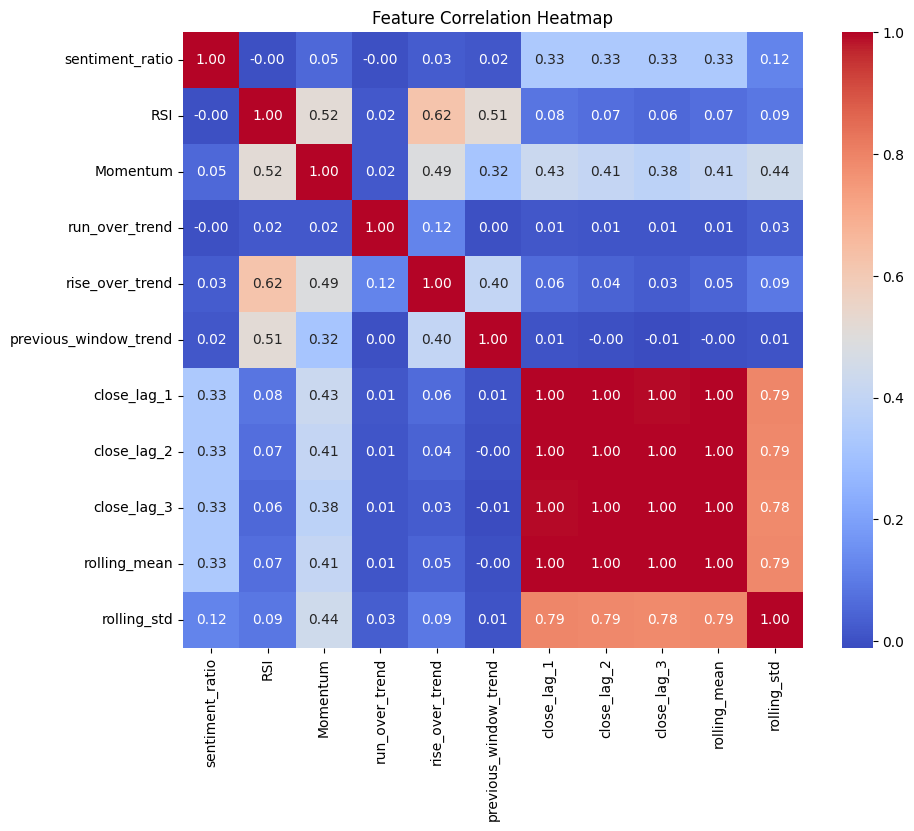

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = prices[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

                       sentiment_ratio       RSI  Momentum  run_over_trend  \
sentiment_ratio               1.000000 -0.002478  0.053144       -0.000893   
RSI                          -0.002478  1.000000  0.517405        0.018923   
Momentum                      0.053144  0.517405  1.000000        0.018438   
run_over_trend               -0.000893  0.018923  0.018438        1.000000   
rise_over_trend               0.027885  0.624473  0.489896        0.122015   
previous_window_trend         0.015873  0.514373  0.320304        0.000478   
close_lag_1                   0.333460  0.084605  0.426594        0.013540   
close_lag_2                   0.333680  0.069197  0.405347        0.011764   
close_lag_3                   0.334907  0.055356  0.383449        0.009829   
rolling_mean                  0.334539  0.070918  0.406129        0.012023   
rolling_std                   0.121695  0.088527  0.442784        0.032046   
y_true                       -0.010251  0.238936  0.117240      

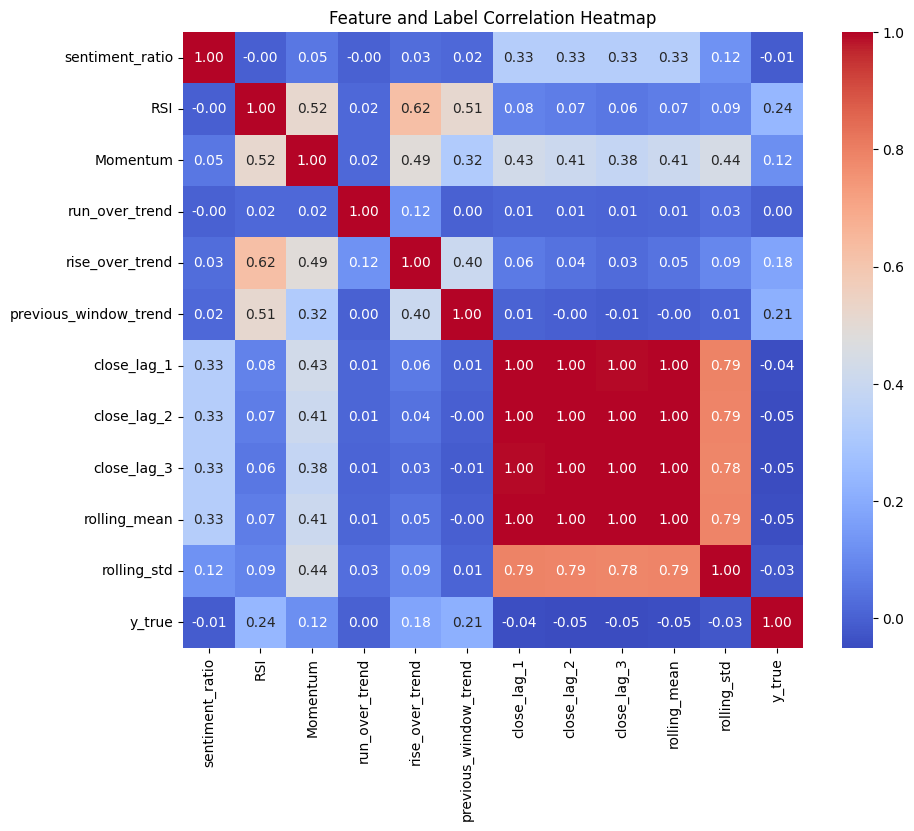

In [74]:
# Compute the correlation matrix including the y_true
correlation_matrix_with_label = prices[features + ['y_true']].corr()

# Display the correlation matrix
print(correlation_matrix_with_label)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_label, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Feature and Label Correlation Heatmap')
plt.show()


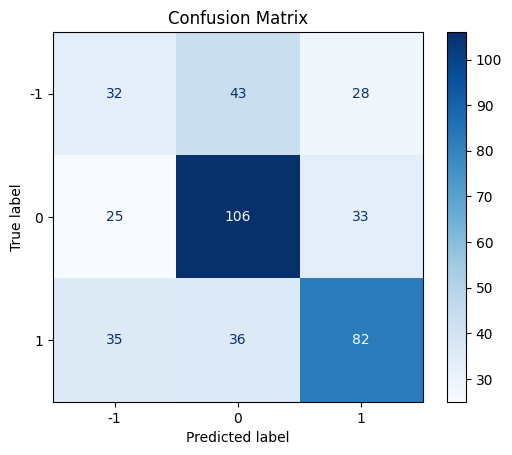

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 5. Iteration and Improvement
# Based on the initial performance, you can consider hyper-parameter tuning, feature selection, or additional feature engineering.